In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Replace with your actual dataset file
df = pd.read_csv("telco_train.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,0
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [8]:
# Check for nulls
print(df.isnull().sum())

# Fill or drop missing values as needed
df.dropna(inplace=True)  # or use df.fillna(method='ffill')

# Convert categorical variables using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('churned', axis=1)
y = df['churned']





gender                 0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
                      ..
TotalCharges_997.75    0
TotalCharges_998.1     0
TotalCharges_999.45    0
TotalCharges_999.8     0
TotalCharges_999.9     0
Length: 5315, dtype: int64


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       839
           1       0.62      0.45      0.52       288

    accuracy                           0.79      1127
   macro avg       0.72      0.68      0.69      1127
weighted avg       0.77      0.79      0.78      1127



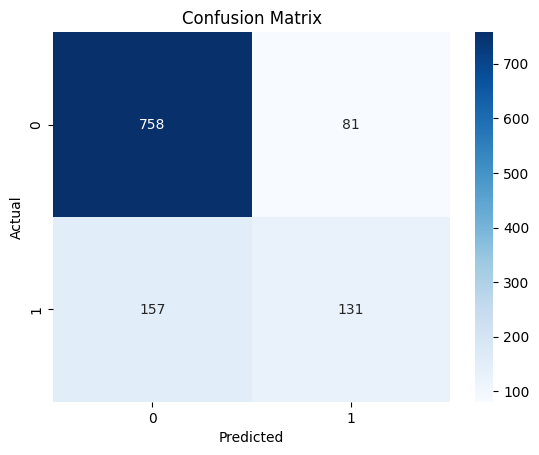

In [13]:
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7888198757763976

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       839
           1       0.62      0.45      0.52       288

    accuracy                           0.79      1127
   macro avg       0.72      0.68      0.69      1127
weighted avg       0.77      0.79      0.78      1127


Confusion Matrix:
 [[758  81]
 [157 131]]


In [14]:
import joblib
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

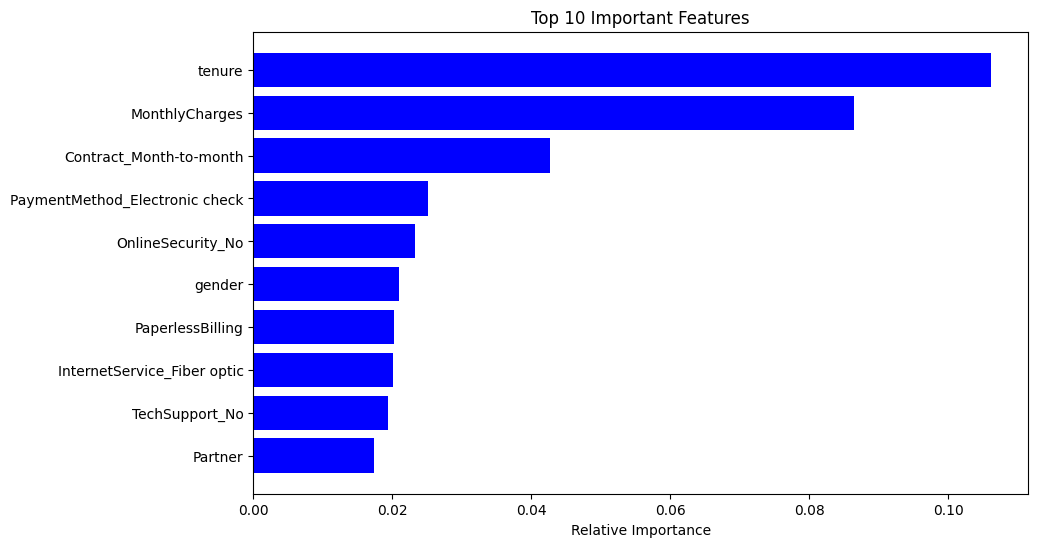

In [12]:
# Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.title('Top 10 Important Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
